In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | meyungs
City not found. Skipping...
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | bom jesus
Processing Record 12 of Set 1 | port alberni
Processing Record 13 of Set 1 | lamu
Processing Record 14 of Set 1 | lorengau
Processing Record 15 of Set 1 | dodola
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | tshikapa
Processing Record 19 of Set 1 | qandala
Processing Record 20 of Set 1 | ugoofaaru
Processing Record 21 of Set 1 | dunedin
Processing Record 22 of Set 1 | bluff
Processing Recor

Processing Record 38 of Set 4 | solwezi
Processing Record 39 of Set 4 | inongo
Processing Record 40 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 4 | samusu
City not found. Skipping...
Processing Record 42 of Set 4 | isangel
Processing Record 43 of Set 4 | galveston
Processing Record 44 of Set 4 | zhuhai
Processing Record 45 of Set 4 | nortelandia
Processing Record 46 of Set 4 | oktyabrskiy
Processing Record 47 of Set 4 | airai
Processing Record 48 of Set 4 | zeya
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | honningsvag
Processing Record 1 of Set 5 | riyadh
Processing Record 2 of Set 5 | mahibadhoo
Processing Record 3 of Set 5 | moryakovskiy zaton
Processing Record 4 of Set 5 | tuktoyaktuk
Processing Record 5 of Set 5 | yulara
Processing Record 6 of Set 5 | bandarbeyla
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | puerto ayora
Processing Record 9 of Set 5 | baykit
Processing Record 10 of Set 5 

Processing Record 26 of Set 8 | yablonovo
Processing Record 27 of Set 8 | ucluelet
Processing Record 28 of Set 8 | richards bay
Processing Record 29 of Set 8 | kasempa
Processing Record 30 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 31 of Set 8 | beyneu
Processing Record 32 of Set 8 | saint-augustin
Processing Record 33 of Set 8 | hihifo
City not found. Skipping...
Processing Record 34 of Set 8 | dingle
Processing Record 35 of Set 8 | los llanos de aridane
Processing Record 36 of Set 8 | kamenka
Processing Record 37 of Set 8 | cayenne
Processing Record 38 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 39 of Set 8 | sinnamary
Processing Record 40 of Set 8 | auki
Processing Record 41 of Set 8 | coquimbo
Processing Record 42 of Set 8 | rungata
City not found. Skipping...
Processing Record 43 of Set 8 | batemans bay
Processing Record 44 of Set 8 | tura
Processing Record 45 of Set 8 | cedar rapids
Processing Record 46 of Set 8 | verkhnyaya toyma
Processing 

Processing Record 11 of Set 12 | hualmay
Processing Record 12 of Set 12 | baghdad
Processing Record 13 of Set 12 | bintulu
Processing Record 14 of Set 12 | amderma
City not found. Skipping...
Processing Record 15 of Set 12 | anadyr
Processing Record 16 of Set 12 | mackay
Processing Record 17 of Set 12 | independence
Processing Record 18 of Set 12 | rafraf
Processing Record 19 of Set 12 | sain alto
Processing Record 20 of Set 12 | biloela
Processing Record 21 of Set 12 | kahului
Processing Record 22 of Set 12 | mananjary
Processing Record 23 of Set 12 | nola
Processing Record 24 of Set 12 | igarka
Processing Record 25 of Set 12 | quesnel
Processing Record 26 of Set 12 | barstow
Processing Record 27 of Set 12 | bassila
Processing Record 28 of Set 12 | nyimba
Processing Record 29 of Set 12 | la ronge
Processing Record 30 of Set 12 | erzin
Processing Record 31 of Set 12 | outjo
Processing Record 32 of Set 12 | trairi
Processing Record 33 of Set 12 | ostrovnoy
Processing Record 34 of Set 12

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,81.07,26,1,1.99,US,2021-10-31 21:54:25
1,East London,-33.0153,27.9116,65.80,82,70,12.64,ZA,2021-10-31 21:57:37
2,Tasiilaq,65.6145,-37.6368,18.16,59,62,5.59,GL,2021-10-31 21:57:37
3,Jamestown,42.0970,-79.2353,53.29,79,75,11.01,US,2021-10-31 21:53:15
4,Longyearbyen,78.2186,15.6401,25.75,88,100,5.99,SJ,2021-10-31 21:57:38
5,Cape Town,-33.9258,18.4232,65.08,71,75,3.00,ZA,2021-10-31 21:57:38
6,Cidreira,-30.1811,-50.2056,68.14,87,7,21.63,BR,2021-10-31 21:57:39
7,Hithadhoo,-0.6000,73.0833,82.31,76,100,18.54,MV,2021-10-31 21:57:39
8,Barrow,71.2906,-156.7887,24.78,94,100,15.43,US,2021-10-31 21:57:40
9,Bom Jesus,-9.0744,-44.3586,86.07,35,85,3.62,BR,2021-10-31 21:57:40


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

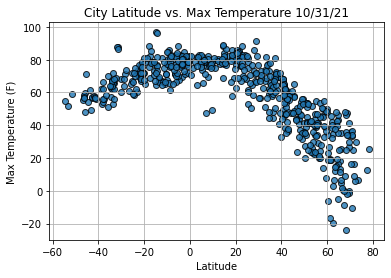

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

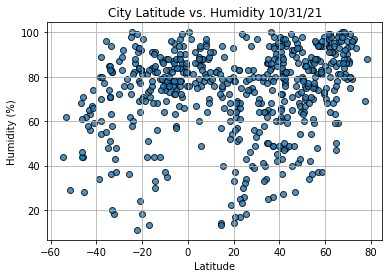

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

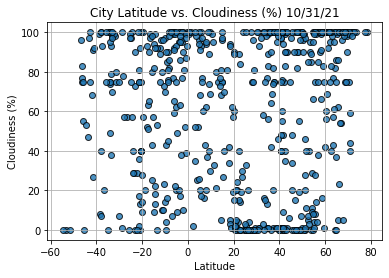

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

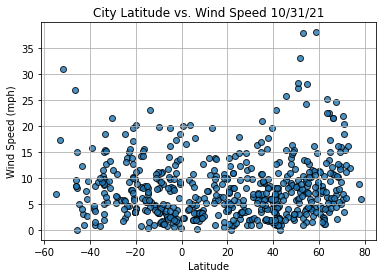

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()